In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\Regression\day1\inclass\mtcars (1).csv')

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [12]:
df.drop(columns= 'model',inplace =True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


In [14]:
df.shape

(32, 11)

In [18]:
df = pd.get_dummies(df ,columns =['cyl','vs','am','gear','carb'],drop_first=True)

In [19]:
df.shape

(32, 17)

In [20]:
df.head()

,mpg,disp,hp,drat,wt,qsec,cyl_6,cyl_8,vs_1,am_1,gear_4,gear_5,carb_2,carb_3,carb_4,carb_6,carb_8
0,21.0,160.0,110,3.90,2.620,16.46,1,0,0,1,1,0,0,0,1,0,0
1,21.0,160.0,110,3.90,2.875,17.02,1,0,0,1,1,0,0,0,1,0,0
2,22.8,108.0,93,3.85,2.320,18.61,0,0,1,1,1,0,0,0,0,0,0
3,21.4,258.0,110,3.08,3.215,19.44,1,0,1,0,0,0,0,0,0,0,0
4,18.7,360.0,175,3.15,3.440,17.02,0,1,0,0,0,0,1,0,0,0,0


In [21]:
y = df['mpg']
X = df.drop(columns= 'mpg')

In [22]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 16)
(10, 16)
(10,)


In [25]:
linreg = LinearRegression()
model =linreg.fit(X_train,y_train)

In [28]:
ypredict =model.predict(X_test)

In [32]:
R2test = linreg.score(X_test,y_test)
R2test

0.4784182423160209

In [33]:
R2train = linreg.score(X_train,y_train)
R2train

0.9577712483239683

## Assumptions For linear Regression

In [37]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()
#H0 : industrial area does not impact price.  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     7.830
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           0.000124
Time:                        17:02:26   Log-Likelihood:                -66.608
No. Observations:                  32   AIC:                             167.2
Df Residuals:                      15   BIC:                             192.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8791     20.066      1.190      0.253     -18.890      66.648
disp           0.0355      0.032      1.114      0.283      -0.032       0.104
hp            -0.0705      0.039     -1.788      0.094      -0.155       0.014
drat           1.1828      2.483      0.476      0.641      -4.111       6.476
wt            -4.5298      2.539     -1.784      0.095      -9.941       0.881
qsec           0.3678      0.935      0.393      0.700      -1.626       2.362
cyl_6         -2.6487      3.041     -0.871      0.397      -9.130       3.833
cyl_8         -0.3362      7.160     -0.047      0.963     -15.596      14.924
vs_1           1.9309      2.871      0.672      0.512      -4.189       8.051
am_1           1.2121      3.214      0.377      0.711      -5.637       8.062
gear_4         1.1144      3.800      0.293      0.773      -6.984       9.213
gear_5         2.5284      3.736      0.677      0.509      -5.435      10.492
carb_2        -0.9794      2.318     -0.423      0.679      -5.920       3.961
carb_3         2.9996      4.294      0.699      0.495      -6.152      12.151
carb_4         1.0914      4.450      0.245      0.810      -8.393      10.576
carb_6         4.4776      6.384      0.701      0.494      -9.130      18.085
carb_8         7.2504      8.361      0.867      0.399     -10.570      25.071
==============================================================================
Omnibus:                        2.468   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.772
Skew:                           0.576   Prob(JB):                        0.412
Kurtosis:                       3.009   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check the Asumptions of Linear Regression

For Linear Regression, we need to check if the 5 major assumptions hold.

1. No Auto correlation
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity



##### Assumption 1- No autocorrelation

1) No Auto correlation. 

Test needed : Durbin- Watson Test.

- It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
- If the value ranges from 2-4, it is known as Negative autocorrelation.
- If the value is exactly 2, it means No Autocorrelation.
- For a good linear model, it should have low or no autocorrelation.

we can see here the values of dublin watson test (test for normality): 1.240 (POSITIVE AUTO-CORRELATION)
    
From the graph below, we can easily see that there is somewhat Positive autocorrelation.

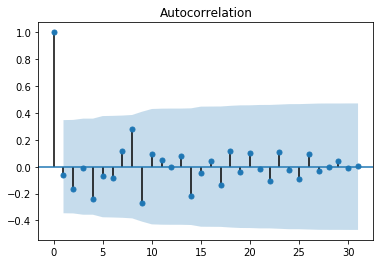

In [39]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid , lags=31 , alpha=0.05)
                            
acf.show()

Assumption 2- Normality of Residuals

In [40]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(1.7723972125851994, 0.4122197878198619)


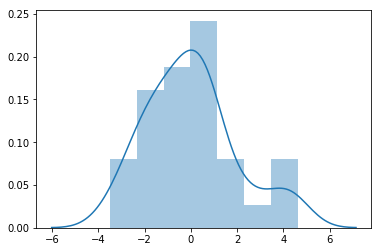

In [41]:
import seaborn as sns

sns.distplot(lin_reg.resid)

Asssumption 3 - Linearity of residuals

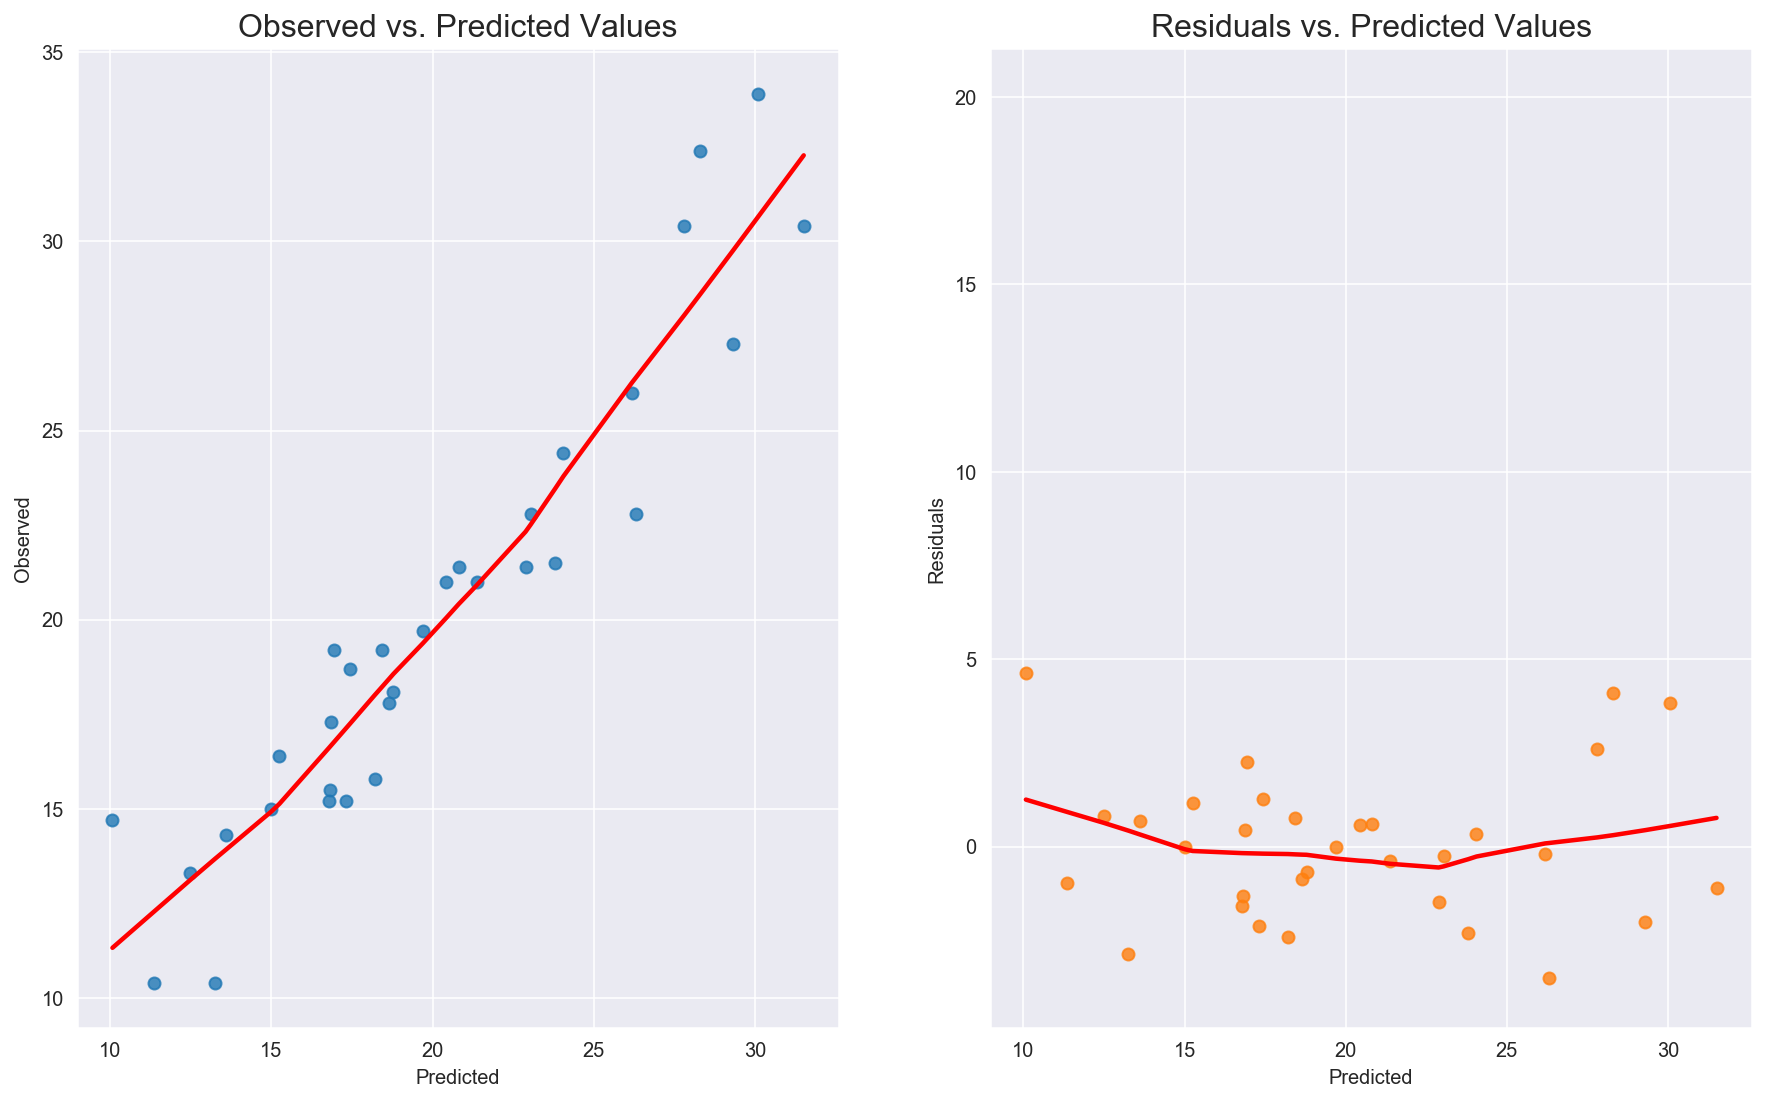

In [42]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

Rainbow test

In [ ]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

In [ ]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [ ]:
lin_reg.resid.mean()

Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)

[('F statistic', 28.337325574978372), ('p-value', 0.03427912443238322)]

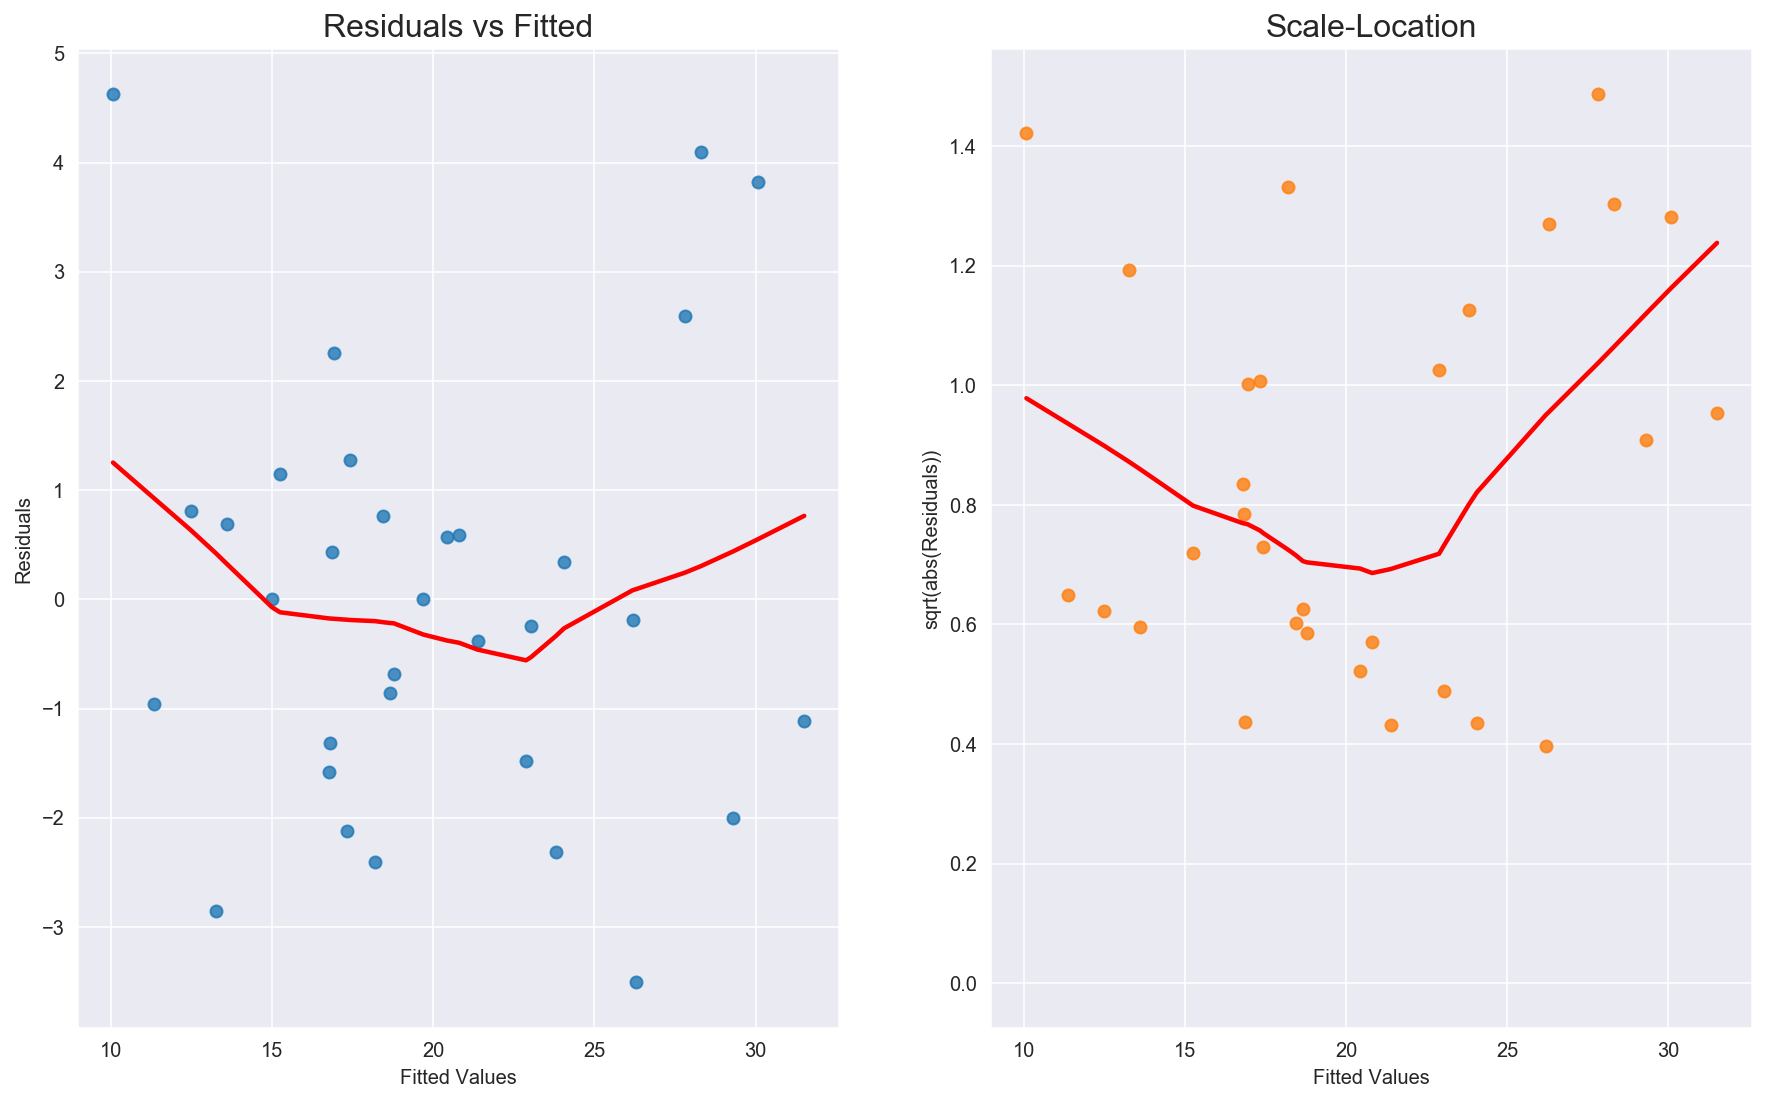

In [43]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,disp,hp,drat,wt,qsec,cyl_6,cyl_8,vs_1,am_1,gear_4,gear_5,carb_2,carb_3,carb_4,carb_6,carb_8
vif,60.365687,28.219577,6.809663,23.83083,10.790189,6.300061,50.289333,8.088166,9.930495,13.488798,7.337293,4.601984,6.243911,16.957962,4.918822,8.436033


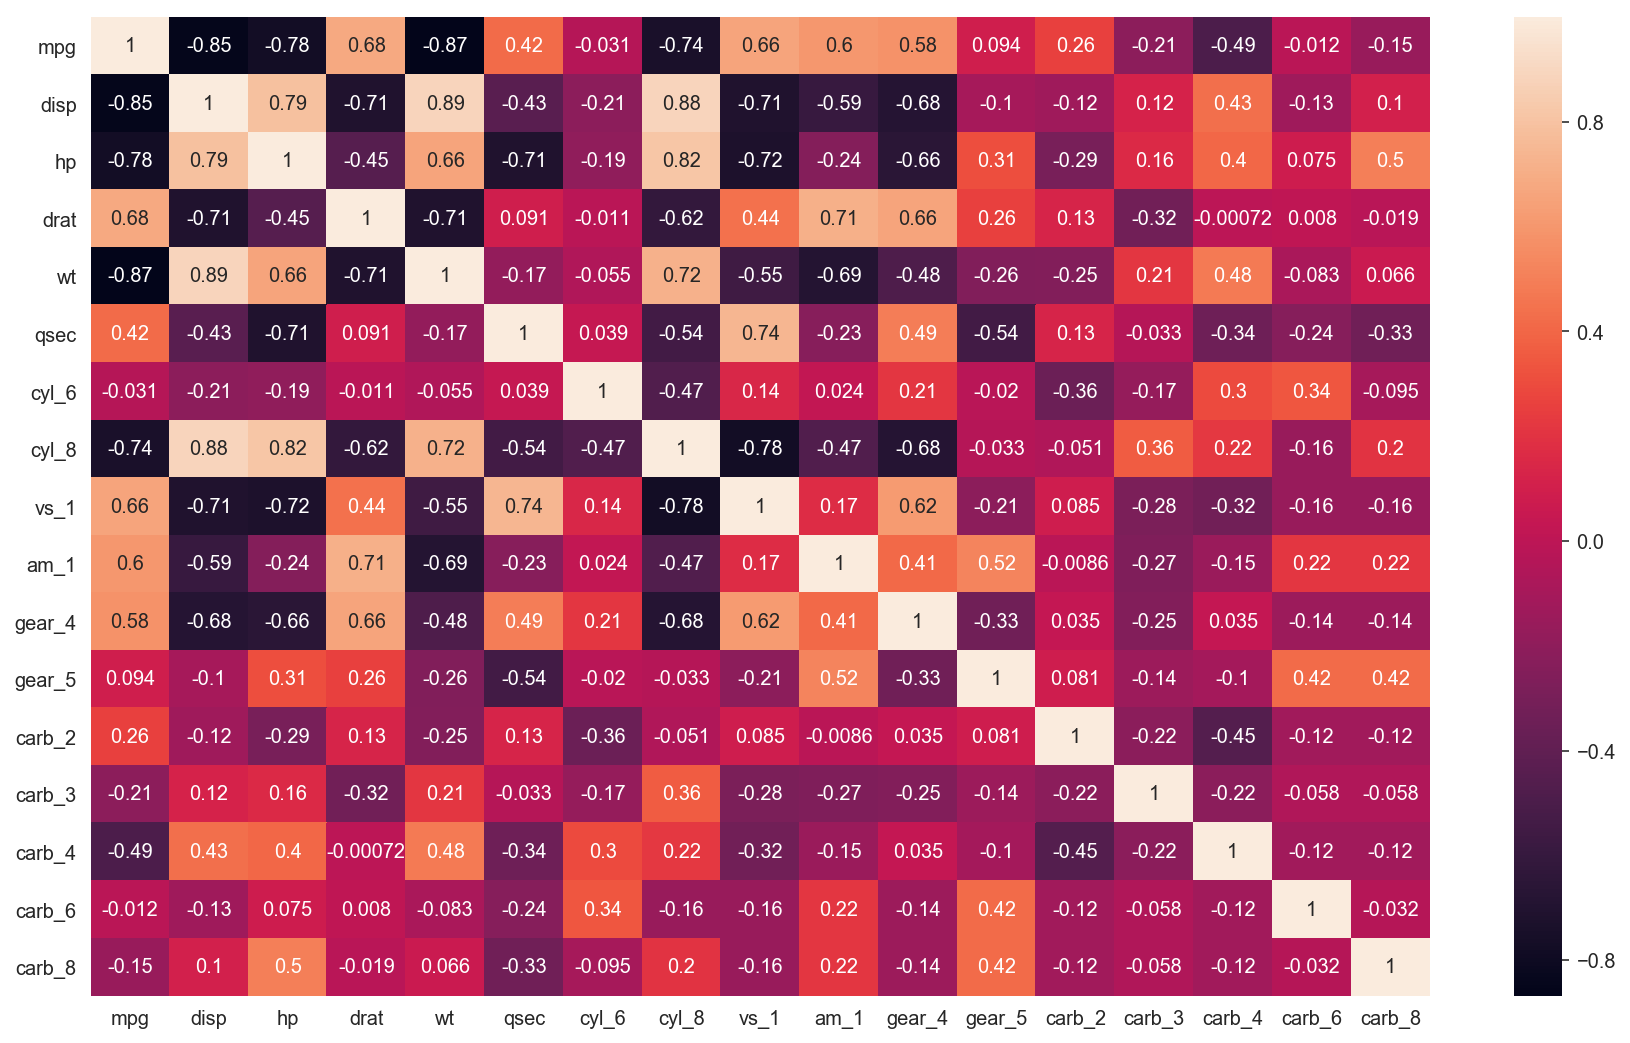

In [48]:
sns.heatmap(df.corr(), annot=True)

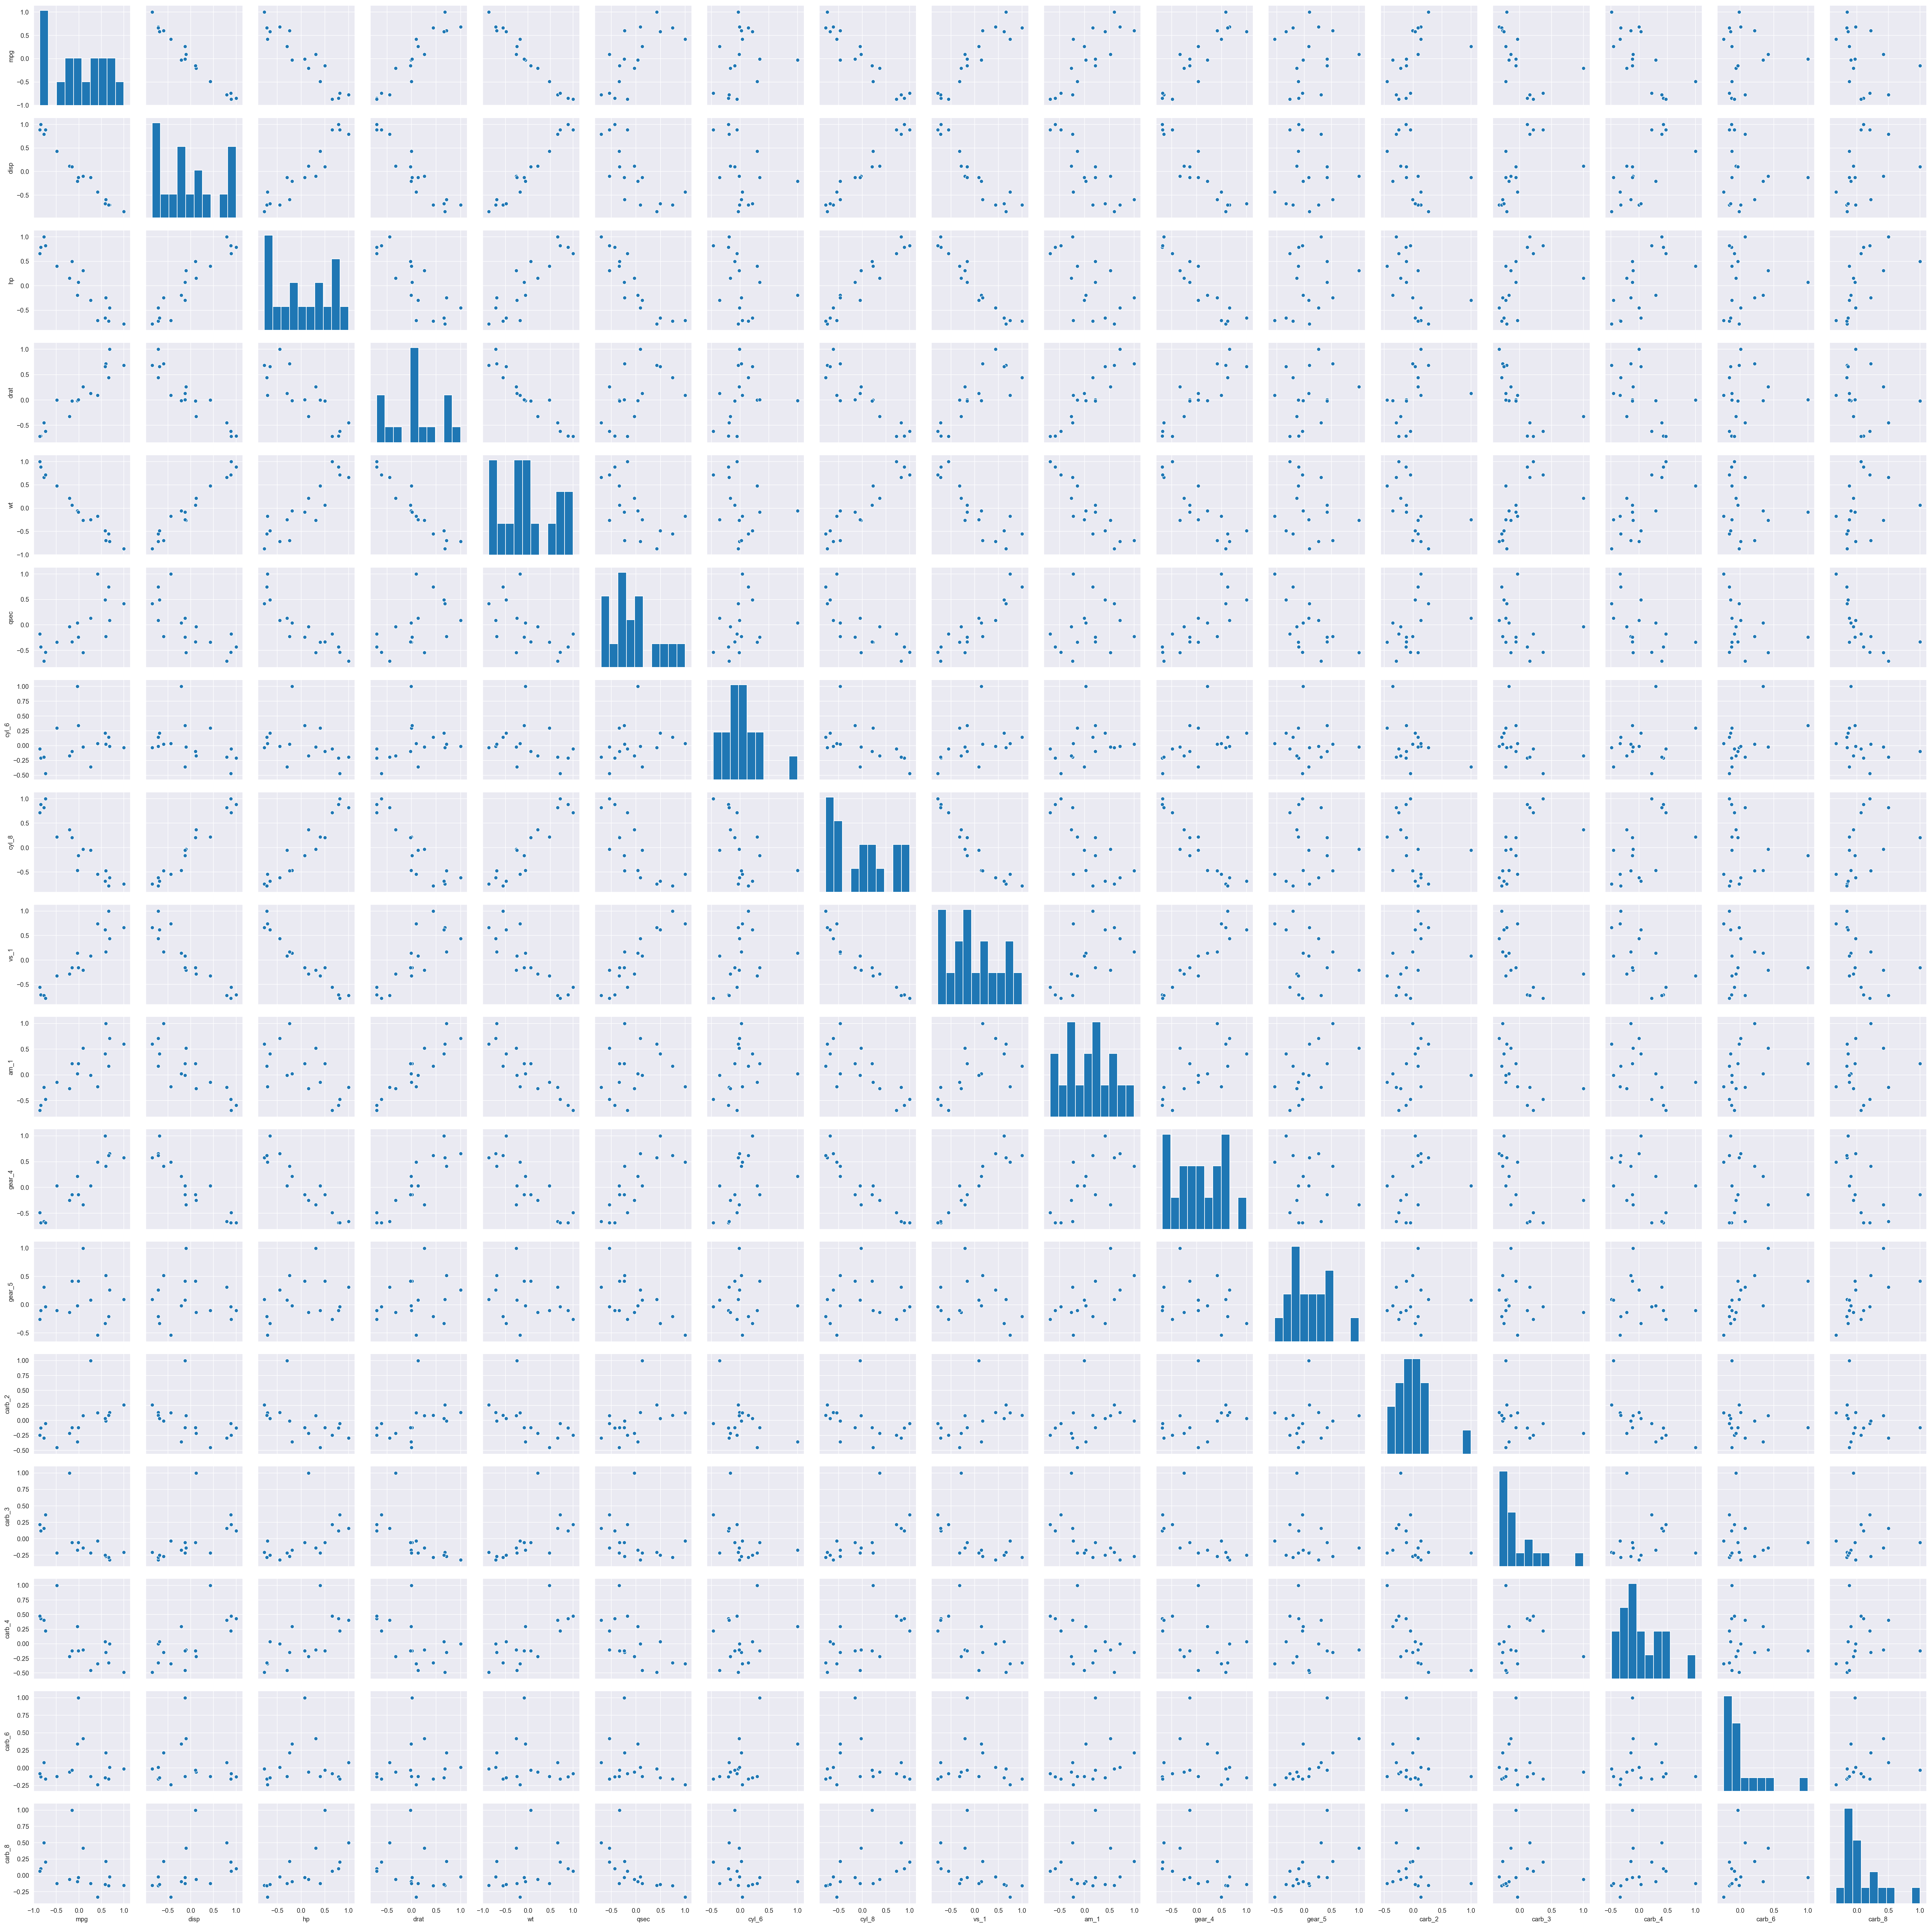

In [51]:
sns.pairplot(df.corr())

In [49]:
df.columns

Index(['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec', 'cyl_6', 'cyl_8', 'vs_1',
       'am_1', 'gear_4', 'gear_5', 'carb_2', 'carb_3', 'carb_4', 'carb_6',
       'carb_8'],
      dtype='object')

In [50]:
##  removed like correlated variables

##Xc = df['']
##Yc = y
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 0.03554632 -0.07050683  1.18283018 -4.52977584  0.36784482 -2.64869528
 -0.33616298  1.93085054  1.2121157   1.11435494  2.52839599 -0.97935432
  2.99963875  1.09142288  4.47756921  7.25041126]
Intercept: 23.879132443339426
R^2 score: 0.8930749320864843
